In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from functions import *

Unique counts = 100


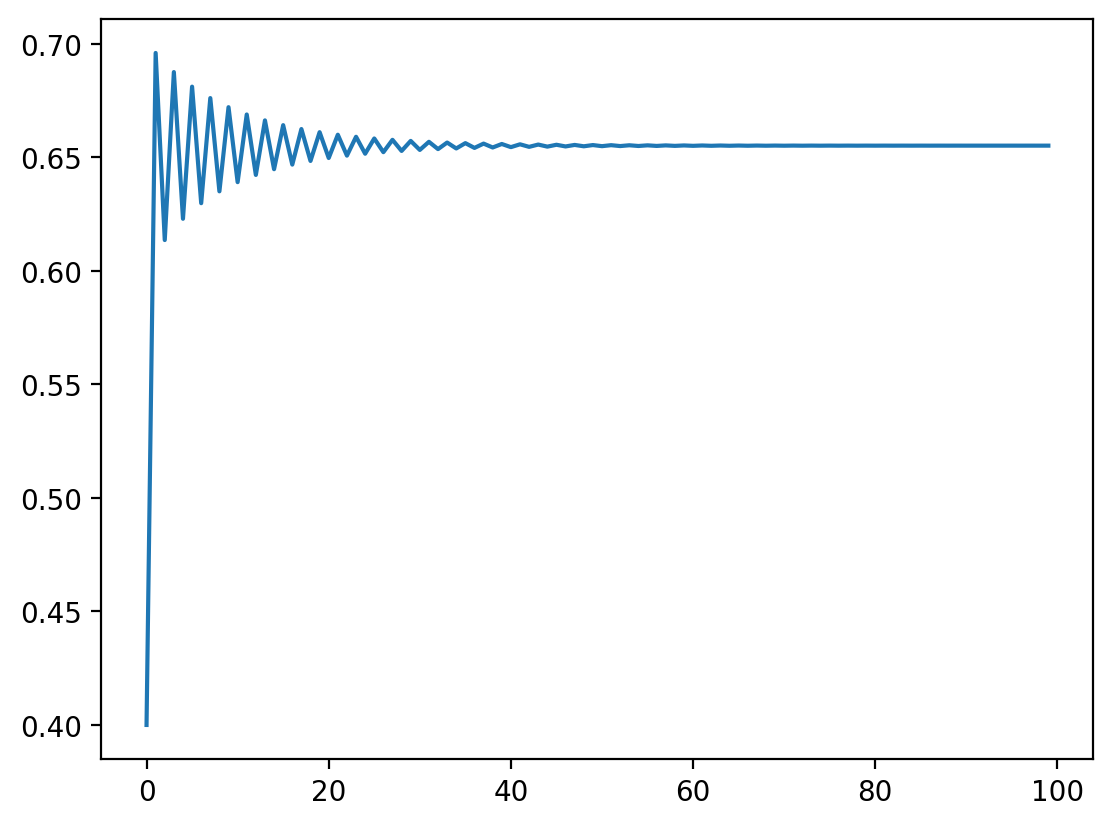

In [9]:
r = 2.9

series = generate_series(r, length=100)
unique_count = np.unique(series.round(decimals=8)).size
print("Unique counts =", unique_count)
plt.plot(series, marker='');

In [ ]:
parameter_range = (0.9, 4) 

parameter_values = np.linspace(*parameter_range, 100)
for parameter in parameter_values:
    
    series = generate_series(parameter, 10000000)[-1000:]
    #unique_values = np.unique(series.round(decimals=8))
    #unique_count = len(unique_values)
    unique_count = len(Counter(series)) 
    print(unique_count, parameter)

In [ ]:
parameter_range = (0.9, 4)

bifurcation_points = find_bifurcation_points(parameter_range)
intervals = np.diff(bifurcation_points)
ratios = differences[:-1] / differences[1:]  # Exclude the last element to avoid division by zero
np.mean(ratios[-10:]) # Average the last few ratios for better convergence

In [ ]:
n = 10000
rrange = (.9, 4)
r = np.linspace(*rrange, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True, dpi=100)
for i in range(iterations):
    
    x = logistic_map(r, x)
    
    # compute the partial sum of the Lyapunov exponent
    lyapunov += np.log(abs(r - 2 * r * x))
    
    ### display the bifurcation diagram
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
        
ax1.set_xlim(*rrange)
ax1.set_title("Bifurcation diagram")


### display the Lyapunov exponent

# horizontal line
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# negative Lyapunov exponent
ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / iterations, '.k', alpha=.5, ms=.5)

# positive Lyapunov exponent
ax2.plot(r[lyapunov >= 0],  lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)

ax2.set_xlim(*rrange)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")

plt.tight_layout()

# Feigenbaum constant convergence

In [12]:
max_it = 13
max_it_j = 10
a1 = 1.0
a2 = 0.0
d1 = 3.2
a = 0.0

print (" i       d")
for i in range(2, max_it + 1):
    a = a1 + (a1 - a2) / d1
    for j in range(1, max_it_j + 1):
        x = 0.0
        y = 0.0
        for k in range(1, (1 << i) + 1):
            y = 1.0 - 2.0 * y * x
            x = a - x * x
        a = a - x / y
    d = (a1 - a2) / (a - a1)
    print("{0:2d}    {1:.8f}".format(i, d))
    d1 = d
    a2 = a1
    a1 = a

 i       d
 2    3.21851142
 3    4.38567760
 4    4.60094928
 5    4.65513050
 6    4.66611195
 7    4.66854858
 8    4.66906066
 9    4.66917155
10    4.66919515
11    4.66920026
12    4.66920098
13    4.66920537
